# TCC mineração de dados nos dados da PRF

## Conjunto de Dados: Acidentes no Espírito Santo (ES) - 2021, 2022, 2023

Este conjunto de dados contém informações detalhadas sobre os acidentes ocorridos no estado do Espírito Santo (ES) nos anos de 2021, 2022 e 2023. Os dados incluem detalhes sobre o local, data, hora, natureza do acidente, condições dos envolvidos, entre outros.

### Estrutura do Conjunto de Dados

O conjunto de dados possui 37 colunas, conforme descrito abaixo:

| Coluna           | Descrição                                                                 |
|------------------|---------------------------------------------------------------------------|
| id               | Identificador do acidente                                                |
| pesid            | Identificador da pessoa envolvida                                        |
| data_inversa     | Data do acidente (YYYY-MM-DD)                                            |
| dia_semana       | Dia da semana em que o acidente ocorreu                                  |
| horario          | Horário do acidente                                                      |
| uf               | Unidade Federativa (Estado)                                              |
| br               | Número da rodovia                                                        |
| km               | Quilômetro da rodovia onde ocorreu o acidente                            |
| municipio        | Município onde ocorreu o acidente                                        |
| causa_principal  | Causa principal do acidente                                              |
| causa_acidente   | Descrição detalhada da causa do acidente                                 |
| tipo_acidente    | Tipo do acidente                                                         |
| classificacao_acidente | Classificação do acidente                                         |
| fase_dia         | Fase do dia (ex: manhã, tarde, noite)                                     |
| sentido_via      | Sentido da via                                                           |
| condicao_metereologica | Condição meteorológica no momento do acidente                     |
| tipo_pista       | Tipo de pista (simples, dupla, etc.)                                      |
| tracado_via      | Traçado da via (reta, curva, etc.)                                        |
| uso_solo         | Uso do solo (urbano, rural)                                               |
| id_veiculo       | Identificador do veículo                                                 |
| tipo_veiculo     | Tipo do veículo (carro, moto, caminhão, etc.)                             |
| marca            | Marca do veículo                                                         |
| ano_fabricacao_veiculo | Ano de fabricação do veículo                                      |
| tipo_envolvido   | Tipo de envolvimento (motorista, passageiro, pedestre)                   |
| estado_fisico    | Estado físico do envolvido (ileso, ferido, morto)                        |
| idade            | Idade do envolvido                                                       |
| sexo             | Sexo do envolvido                                                        |
| ilesos           | Número de ilesos no acidente                                             |
| feridos_leves    | Número de feridos leves no acidente                                      |
| feridos_graves   | Número de feridos graves no acidente                                     |
| mortos           | Número de mortos no acidente                                             |
| latitude         | Latitude do local do acidente                                            |
| longitude        | Longitude do local do acidente                                           |
| regional         | Regional da Polícia Rodoviária Federal responsável pela área             |
| delegacia        | Delegacia da Polícia Rodoviária Federal responsável pela área            |
| uop              | Unidade Operacional da Polícia Rodoviária Federal responsável pela área  |

## Estatísticas dos Dados

### Distribuição por Ano

- Total de registros em 2021: `11110` 
- Total de registros em 2022: `10334` 
- Total de registros em 2023: `12386` 

### Principais Causas de Acidentes

1. Causa 1: `Reação tardia ou ineficiente do condutor = 3027` 
2. Causa 2: `Acessar a via sem observar a presença dos outros veículos = 2801`
3. Causa 3: `Condutor deixou de manter distância do veículo da frente = 2514`
4. Causa 4: `Velocidade Incompatível = 2345`
5. Causa 5: `Ausência de reação do condutor = 2255`

In [ ]:

import os
import pandas as pd
import seaborn as sns
import numpy as np 

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.options.display.float_format = '{:.2f}'.format

df1 = pd.read_csv(r"C:\Users\gusta\Desktop\TCC Gustavo\TCC\datasets_tcc\acidentes2021.csv", sep = ';' , encoding='latin-1')
df2 = pd.read_csv(r"C:\Users\gusta\Desktop\TCC Gustavo\TCC\datasets_tcc\acidentes2022.csv", sep = ';' , encoding='latin-1')
df3 = pd.read_csv(r"C:\Users\gusta\Desktop\TCC Gustavo\TCC\datasets_tcc\acidentes2023.csv", sep = ';' , encoding='latin-1')
common_columns = list(set(df1.columns) & set(df2.columns) & set(df3.columns))
if not common_columns:
    raise ValueError("Não há colunas comuns entre os DataFrames.")

df4 = pd.merge(df1, df2, on=common_columns, how='outer')
df4 = pd.merge(df4, df3, on=common_columns, how='outer')


display(df4.columns)

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [ ]:
import pandas as pd

file_path1 = 'C:/Users/gusta/Desktop/TCC Gustavo/datasets/2021.csv'
file_path2 = 'C:/Users/gusta/Desktop/TCC Gustavo/datasets/2022.csv'
file_path3 = 'C:/Users/gusta/Desktop/TCC Gustavo/datasets/2023.csv'

df1 = pd.read_csv(file_path1, delimiter=';', encoding='ISO-8859-1')
df2 = pd.read_csv(file_path2, delimiter=';', encoding='ISO-8859-1')
df3 = pd.read_csv(file_path3, delimiter=';', encoding='ISO-8859-1')

df_combined = pd.concat([df1, df2, df3], ignore_index=True)

df_filtered = df_combined[df_combined['uf'] == 'ES']

output_path = 'C:/Users/gusta/Desktop/TCC Gustavo/acidentes_filtrados_ES.csv'
df_filtered.to_csv(output_path, index=False, encoding='ISO-8859-1', sep=',')

print(f"Dataset combinado e filtrado salvo em: {output_path}")


Dataset combinado e filtrado salvo em: C:/Users/gusta/Desktop/TCC Gustavo/acidentes_filtrados_ES.csv


In [ ]:
import pandas as pd

file_path1 = 'C:/Users/gusta/Desktop/TCC Gustavo/datasets/2021.csv'
file_path2 = 'C:/Users/gusta/Desktop/TCC Gustavo/datasets/2022.csv'
file_path3 = 'C:/Users/gusta/Desktop/TCC Gustavo/datasets/2023.csv'

df1 = pd.read_csv(file_path1, delimiter=';', encoding='ISO-8859-1', low_memory=False)
df2 = pd.read_csv(file_path2, delimiter=';', encoding='ISO-8859-1', low_memory=False)
df3 = pd.read_csv(file_path3, delimiter=';', encoding='ISO-8859-1', low_memory=False)

df_combined = pd.concat([df1, df2, df3], ignore_index=True)

df_combined.columns = df_combined.columns.str.replace('"', '').str.strip()

df_combined['data_inversa'] = pd.to_datetime(df_combined['data_inversa'], format='%Y-%m-%d', errors='coerce')

df_combined['ano'] = df_combined['data_inversa'].dt.year

rodovias_interesse = ['101', '163', '364', '230']

df_combined['br'] = df_combined['br'].astype(str).str.split('.').str[0].str.strip()

df_filtered = df_combined[df_combined['br'].isin(rodovias_interesse)]

output_path = 'C:/Users/gusta/Desktop/TCC Gustavo/acidentes_filtrados_BR.csv'
df_filtered.to_csv(output_path, index=False, encoding='ISO-8859-1', sep=',')


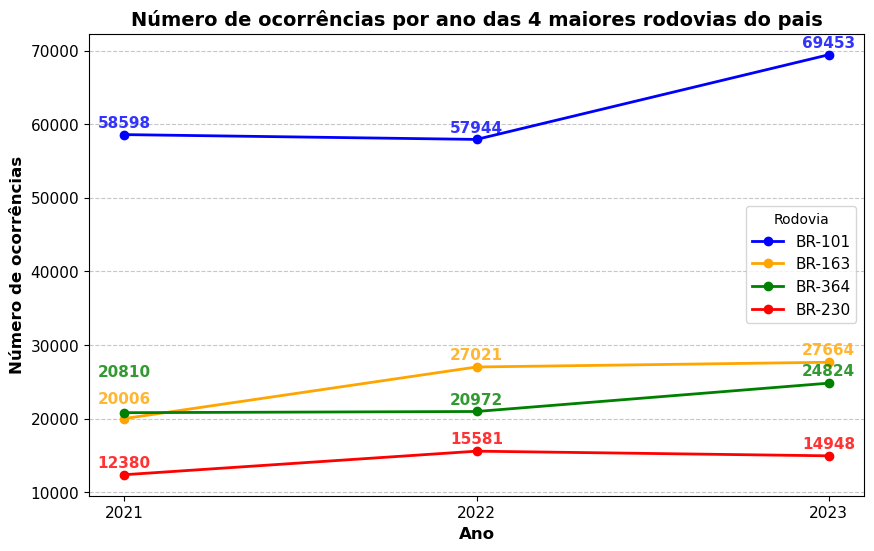

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Users/gusta/Desktop/TCC Gustavo/acidentes_filtrados_BR.csv'

df = pd.read_csv(file_path, delimiter=',', encoding='ISO-8859-1')

df['data_inversa'] = pd.to_datetime(df['data_inversa'], format='%Y-%m-%d', errors='coerce')

df['ano'] = df['data_inversa'].dt.year

rodovias_interesse = ['101', '163', '364', '230']

df['br'] = df['br'].astype(str).str.strip()

df_filtered = df[df['br'].isin(rodovias_interesse)]

df_grouped = df_filtered.groupby(['ano', 'br']).size().unstack()

plt.figure(figsize=(10, 6))

cores = {'101': 'blue', '163': 'orange', '364': 'green', '230': 'red'}

for rodovia in rodovias_interesse:
    plt.plot(df_grouped.index, df_grouped[rodovia], marker='o', label=f'BR-{rodovia}', 
             linewidth=2, color=cores[rodovia])

plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Número de ocorrências', fontsize=12, fontweight='bold')
plt.title('Número de ocorrências por ano das 4 maiores rodovias do pais', fontsize=14, fontweight='bold')
plt.xticks(sorted(df_grouped.index), fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Rodovia', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for rodovia in rodovias_interesse:
    for i, (ano, ocorrencias) in enumerate(df_grouped[rodovia].items()):
        deslocamento = 1000  

        if i == 0 and rodovia == '163':  
            deslocamento = 2000  
        elif i == 0 and rodovia == '364':
            deslocamento = 5000  

        plt.text(ano, ocorrencias + deslocamento, str(ocorrencias), 
                 ha='center', fontweight='bold', fontsize=11, 
                 color=cores[rodovia], alpha=0.8)  

plt.show()



In [ ]:
df4 = df4[df4['uf'] =='ES']
df4 = df4.drop_duplicates()

df4.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
84,331722.00,739907.00,2021-01-01,sexta-feira,04:10:00,ES,101.00,"52,7",SAO MATEUS,Sim,Condutor deixou de manter distância do veículo...,3,Saída de leito carroçável,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,595140.00,Automóvel,VW/FOX 1.6 PRIME GII/FOX 1.6 PRIME GII/FOX 1.6...,2010.00,Condutor,Ileso,34.00,Masculino,1.00,0.00,0.00,0.00,"-18,60327989","-39,88710063",SPRF-ES,DEL04-ES,UOP02-DEL04-ES
85,331722.00,739903.00,2021-01-01,sexta-feira,04:10:00,ES,101.00,"52,7",SAO MATEUS,Sim,Condutor deixou de manter distância do veículo...,3,Saída de leito carroçável,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,595139.00,Automóvel,FIAT/UNO MILLE WAY ECON/UNO MILLE WAY ECON/UNO...,2008.00,Condutor,Ileso,23.00,Masculino,1.00,0.00,0.00,0.00,"-18,60327989","-39,88710063",SPRF-ES,DEL04-ES,UOP02-DEL04-ES
86,331722.00,739907.00,2021-01-01,sexta-feira,04:10:00,ES,101.00,"52,7",SAO MATEUS,Sim,Condutor deixou de manter distância do veículo...,2,Capotamento,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,595140.00,Automóvel,VW/FOX 1.6 PRIME GII/FOX 1.6 PRIME GII/FOX 1.6...,2010.00,Condutor,Ileso,34.00,Masculino,1.00,0.00,0.00,0.00,"-18,60327989","-39,88710063",SPRF-ES,DEL04-ES,UOP02-DEL04-ES
87,331722.00,739903.00,2021-01-01,sexta-feira,04:10:00,ES,101.00,"52,7",SAO MATEUS,Sim,Condutor deixou de manter distância do veículo...,2,Capotamento,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,595139.00,Automóvel,FIAT/UNO MILLE WAY ECON/UNO MILLE WAY ECON/UNO...,2008.00,Condutor,Ileso,23.00,Masculino,1.00,0.00,0.00,0.00,"-18,60327989","-39,88710063",SPRF-ES,DEL04-ES,UOP02-DEL04-ES
88,331722.00,739907.00,2021-01-01,sexta-feira,04:10:00,ES,101.00,"52,7",SAO MATEUS,Sim,Condutor deixou de manter distância do veículo...,1,Colisão traseira,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,595140.00,Automóvel,VW/FOX 1.6 PRIME GII/FOX 1.6 PRIME GII/FOX 1.6...,2010.00,Condutor,Ileso,34.00,Masculino,1.00,0.00,0.00,0.00,"-18,60327989","-39,88710063",SPRF-ES,DEL04-ES,UOP02-DEL04-ES


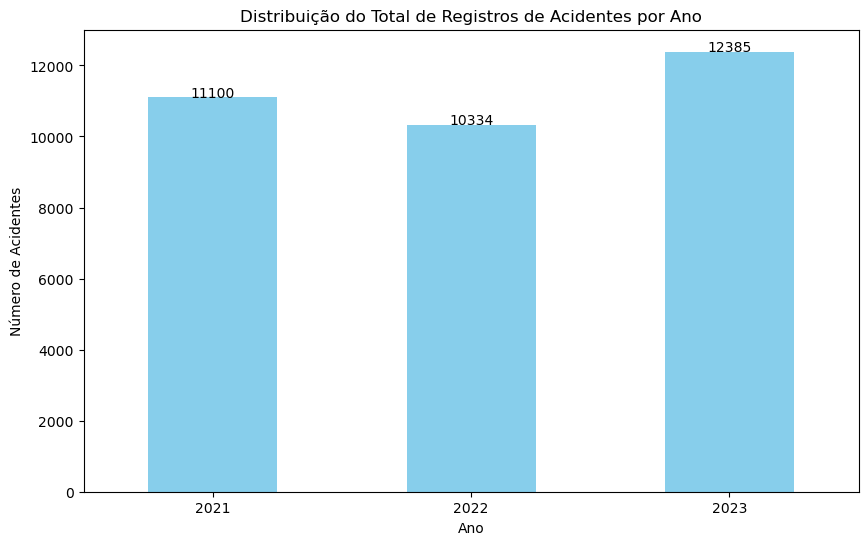

ano
2021    11100
2022    10334
2023    12385
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "C:/Users/gusta/Desktop/TCC Gustavo/notebooks/acidentes_filtrados_ES_FULL.csv"

data = pd.read_csv(file_path, delimiter=',', encoding='ISO-8859-1')

data['data_inversa'] = pd.to_datetime(data['data_inversa'], errors='coerce')

data['ano'] = data['data_inversa'].dt.year

acidentes_por_ano = data['ano'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
acidentes_por_ano.plot(kind='bar', color='skyblue')
plt.title('Distribuição do Total de Registros de Acidentes por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=0)
for index, value in enumerate(acidentes_por_ano):
    plt.text(index, value + 10, str(value), ha='center')
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = df4  

causas_filtradas = data[data['causa_principal'].str.upper() == 'SIM']

causas_agrupadas = causas_filtradas['causa_acidente'].value_counts()

print("Principais Causas de Acidentes quando 'causa_principal' é 'SIM':\n")
print(causas_agrupadas)

Principais Causas de Acidentes quando 'causa_principal' é 'SIM':

causa_acidente
Reação tardia ou ineficiente do condutor                                        3027
Acessar a via sem observar a presença dos outros veículos                       2801
Condutor deixou de manter distância do veículo da frente                        2514
Velocidade Incompatível                                                         2345
Ausência de reação do condutor                                                  2255
Manobra de mudança de faixa                                                     1794
Transitar na contramão                                                          1201
Ultrapassagem Indevida                                                          1141
Ingestão de álcool pelo condutor                                                 962
Desrespeitar a preferência no cruzamento                                         776
Condutor desrespeitou a iluminação vermelha do semáforo              

In [ ]:
import pandas as pd

data = df4
total_ilesos = int(data['ilesos'].sum())
total_feridos_leves = int(data['feridos_leves'].sum())
total_feridos_graves = int(data['feridos_graves'].sum())
total_mortos = int(data['mortos'].sum())

print(f"Total de ilesos: {total_ilesos}")
print(f"Total de feridos leves: {total_feridos_leves}")
print(f"Total de feridos graves: {total_feridos_graves}")
print(f"Total de mortos: {total_mortos}")

condicoes_totais = pd.DataFrame({
    'Condição': ['Ilesos', 'Feridos Leves', 'Feridos Graves', 'Mortos'],
    'Total': [total_ilesos, total_feridos_leves, total_feridos_graves, total_mortos]
})

print(condicoes_totais)

Total de ilesos: 11675
Total de feridos leves: 11007
Total de feridos graves: 5564
Total de mortos: 1161
         Condição  Total
0          Ilesos  11675
1   Feridos Leves  11007
2  Feridos Graves   5564
3          Mortos   1161


In [3]:
print(data.columns)


Index(['id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop'], dtype='object')


In [ ]:
import pandas as pd

file_path = "C:/Users/gusta/Desktop/TCC Gustavo/notebooks/acidentes_filtrados_ES.csv"
output_path = "C:/Users/gusta/Desktop/TCC Gustavo/notebooks/acidentes_filtrados_ES_convertido.csv"

data = pd.read_csv(file_path, delimiter=',', encoding='ISO-8859-1')

print("Antes da conversão:", data["data_inversa"].head(10))

data["data_inversa"] = data["data_inversa"].astype(str).str.strip()

def convert_date(date_str):
    try:
        return pd.to_datetime(date_str, format="%Y-%m-%d").strftime("%d/%m/%Y")
    except Exception:
        try:
            return pd.to_datetime(date_str, errors='coerce').strftime("%d/%m/%Y")
        except Exception:
            return None  

data["data_inversa"] = data["data_inversa"].apply(convert_date)

missing_dates = data["data_inversa"].isnull().sum()
if missing_dates > 0:
    print(f"⚠️ {missing_dates} datas não puderam ser convertidas corretamente! Aplicando preenchimento...")

data["data_inversa"] = data["data_inversa"].fillna(method="ffill")

print("Depois da conversão:", data["data_inversa"].head(10))

data.to_csv(output_path, index=False, encoding="ISO-8859-1")

print(f"✅ Arquivo convertido e salvo em: {output_path}")


Antes da conversão: 0    2021-01-01
1    2021-01-01
2    2021-01-01
3    2021-01-01
4    2021-01-01
5    2021-01-01
6    2021-01-01
7    2021-01-01
8    2021-01-01
9    2021-01-01
Name: data_inversa, dtype: object


C:\Users\gusta\AppData\Local\Temp\ipykernel_20976\4083471656.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["data_inversa"] = data["data_inversa"].fillna(method="ffill")


Depois da conversão: 0    01/01/2021
1    01/01/2021
2    01/01/2021
3    01/01/2021
4    01/01/2021
5    01/01/2021
6    01/01/2021
7    01/01/2021
8    01/01/2021
9    01/01/2021
Name: data_inversa, dtype: object
✅ Arquivo convertido e salvo em: C:/Users/gusta/Desktop/TCC Gustavo/notebooks/acidentes_filtrados_ES_convertido.csv


In [ ]:
import pandas as pd

file_path = "C:/Users/gusta/Desktop/TCC Gustavo/notebooks/acidentes_filtrados_ES.csv"
output_path = "C:/Users/gusta/Desktop/TCC Gustavo/notebooks/acidentes_filtrados_ES_convertido.csv"

data = pd.read_csv(file_path, delimiter=',', encoding='ISO-8859-1')

print("Antes da conversão:", data["data_inversa"].head(10))

data["data_inversa"] = data["data_inversa"].astype(str).str.strip()

def convert_date(date_str):
    try:
        return pd.to_datetime(date_str, format="%Y-%m-%d").strftime("%d/%m/%Y")
    except Exception:
        try:
            return pd.to_datetime(date_str, errors='coerce').strftime("%d/%m/%Y")
        except Exception:
            return None  

data["data_inversa"] = data["data_inversa"].apply(convert_date)

missing_dates = data["data_inversa"].isnull().sum()
if missing_dates > 0:
    print(f"⚠️ {missing_dates} datas não puderam ser convertidas corretamente! Aplicando preenchimento...")

data["data_inversa"] = data["data_inversa"].fillna(method="ffill")

print("Depois da conversão:", data["data_inversa"].head(10))

data.to_csv(output_path, index=False, encoding="ISO-8859-1")

print(f"✅ Arquivo convertido e salvo em: {output_path}")


Antes da conversão: 0    2021-01-01
1    2021-01-01
2    2021-01-01
3    2021-01-01
4    2021-01-01
5    2021-01-01
6    2021-01-01
7    2021-01-01
8    2021-01-01
9    2021-01-01
Name: data_inversa, dtype: object


C:\Users\gusta\AppData\Local\Temp\ipykernel_20976\4083471656.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["data_inversa"] = data["data_inversa"].fillna(method="ffill")


Depois da conversão: 0    01/01/2021
1    01/01/2021
2    01/01/2021
3    01/01/2021
4    01/01/2021
5    01/01/2021
6    01/01/2021
7    01/01/2021
8    01/01/2021
9    01/01/2021
Name: data_inversa, dtype: object
✅ Arquivo convertido e salvo em: C:/Users/gusta/Desktop/TCC Gustavo/notebooks/acidentes_filtrados_ES_convertido.csv


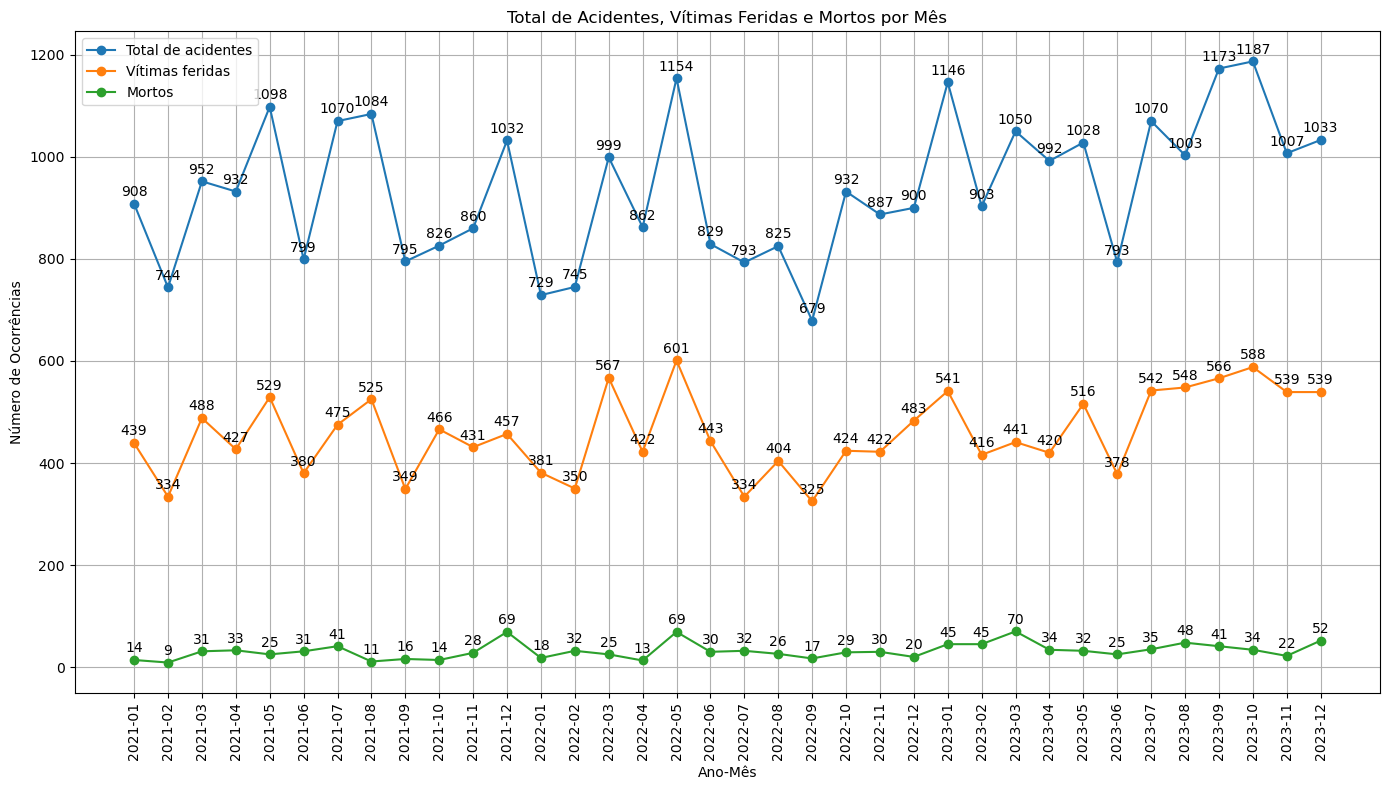

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "C:/Users/gusta/Desktop/TCC Gustavo/notebooks/acidentes_filtrados_ES_convertido.csv"

data = pd.read_csv(file_path, delimiter=",", encoding="ISO-8859-1")

if "data_inversa" in data.columns:
    data["data_inversa"] = pd.to_datetime(data["data_inversa"], format="%d/%m/%Y", errors="coerce")

    missing_dates = data["data_inversa"].isnull().sum()
    if missing_dates > 0:
        print(f"⚠️ Existem {missing_dates} valores inválidos na coluna 'data_inversa'. Verifique os dados.")

    data["ano"] = data["data_inversa"].dt.year
    data["mes"] = data["data_inversa"].dt.month

    dados_agrupados = data.groupby(["ano", "mes"]).agg({
        "id": "count",  
        "feridos_leves": "sum",  
        "feridos_graves": "sum",
        "mortos": "sum"
    }).reset_index()

    dados_agrupados["vitimas_feridas"] = dados_agrupados["feridos_leves"] + dados_agrupados["feridos_graves"]

    dados_agrupados.rename(columns={"id": "total_acidentes"}, inplace=True)

    dados_agrupados["ano_mes"] = dados_agrupados["ano"].astype(str) + "-" + dados_agrupados["mes"].astype(str).str.zfill(2)

    x_values = dados_agrupados["ano_mes"].to_numpy()
    y_acidentes = dados_agrupados["total_acidentes"].to_numpy()
    y_feridos = dados_agrupados["vitimas_feridas"].to_numpy()
    y_mortos = dados_agrupados["mortos"].to_numpy()

    plt.figure(figsize=(14, 8))

    plt.plot(x_values, y_acidentes, label="Total de acidentes", marker="o")
    plt.plot(x_values, y_feridos, label="Vítimas feridas", marker="o")
    plt.plot(x_values, y_mortos, label="Mortos", marker="o")

    for i in range(len(x_values)):
        plt.text(i, y_acidentes[i] + 15, str(int(y_acidentes[i])), ha="center")
        plt.text(i, y_feridos[i] + 15, str(int(y_feridos[i])), ha="center")
        plt.text(i, y_mortos[i] + 15, str(int(y_mortos[i])), ha="center")

    plt.title("Total de Acidentes, Vítimas Feridas e Mortos por Mês")
    plt.xlabel("Ano-Mês")
    plt.ylabel("Número de Ocorrências")
    plt.xticks(rotation=90)  
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  
    plt.show()

else:
    print("Erro coluna data_inversa não foi encontrada.")


In [ ]:
import pandas as pd

file_path = 'C:/Users/gusta/Desktop/TCC Gustavo/notebooks/acidentes_filtrados_ES_convertido.csv'

output_path = 'C:/Users/gusta/Desktop/TCC Gustavo/notebooks/relatorio_acidentes.txt'

data = pd.read_csv(file_path, delimiter=',', encoding='ISO-8859-1')

data['data_inversa'] = pd.to_datetime(data['data_inversa'], format='%d/%m/%Y', errors='coerce')

data['ano'] = data['data_inversa'].dt.year
data['mes'] = data['data_inversa'].dt.month

dados_agrupados = data.groupby(['ano', 'mes']).agg({
    'id': 'count',  
    'feridos_leves': 'sum',  
    'feridos_graves': 'sum',
    'mortos': 'sum'
}).reset_index()

dados_agrupados['vitimas_feridas'] = dados_agrupados['feridos_leves'] + dados_agrupados['feridos_graves']

dados_agrupados['ano_mes'] = dados_agrupados['ano'].astype(str) + '-' + dados_agrupados['mes'].astype(str).str.zfill(2)

with open(output_path, 'w', encoding='utf-8') as file:
    for index, row in dados_agrupados.iterrows():
        file.write(f"Mês: {row['ano_mes']}\n")
        file.write(f"  Total de Acidentes: {row['id']}\n")
        file.write(f"  Vítimas Feridas: {row['vitimas_feridas']}\n")
        file.write(f"  Mortos: {row['mortos']}\n")
        file.write("----------\n")

print(f"✅ Relatório salvo em: {output_path}")


✅ Relatório salvo em: C:/Users/gusta/Desktop/TCC Gustavo/notebooks/relatorio_acidentes.txt


In [ ]:
import pandas as pd

file_path = 'C:/Users/gusta/Desktop/TCC Gustavo/notebooks/acidentes_filtrados_ES_convertido.csv'

data = pd.read_csv(file_path, delimiter=',', encoding='ISO-8859-1')

data['data_inversa'] = pd.to_datetime(data['data_inversa'], format='%d/%m/%Y', errors='coerce')

data['ano'] = data['data_inversa'].dt.year
data['mes'] = data['data_inversa'].dt.month

data['semestre'] = data['mes'].apply(lambda x: 1 if x <= 6 else 2)

dados_agrupados = data.groupby(['ano', 'semestre']).agg({
    'id': 'count',  
    'feridos_leves': 'sum',  
    'feridos_graves': 'sum',
    'mortos': 'sum'
}).reset_index()

dados_agrupados['vitimas_feridas'] = dados_agrupados['feridos_leves'] + dados_agrupados['feridos_graves']

for index, row in dados_agrupados.iterrows():
    print(f"Ano: {row['ano']} - Semestre: {row['semestre']}º")
    print(f"  Total de Acidentes: {row['id']}")
    print(f"  Vítimas Feridas: {row['vitimas_feridas']}")
    print(f"  Mortos: {row['mortos']}")
    print("----------")



Ano: 2021.0 - Semestre: 1.0º
  Total de Acidentes: 5433.0
  Vítimas Feridas: 2597.0
  Mortos: 143.0
----------
Ano: 2021.0 - Semestre: 2.0º
  Total de Acidentes: 5667.0
  Vítimas Feridas: 2703.0
  Mortos: 179.0
----------
Ano: 2022.0 - Semestre: 1.0º
  Total de Acidentes: 5318.0
  Vítimas Feridas: 2764.0
  Mortos: 187.0
----------
Ano: 2022.0 - Semestre: 2.0º
  Total de Acidentes: 5016.0
  Vítimas Feridas: 2392.0
  Mortos: 154.0
----------
Ano: 2023.0 - Semestre: 1.0º
  Total de Acidentes: 5912.0
  Vítimas Feridas: 2712.0
  Mortos: 251.0
----------
Ano: 2023.0 - Semestre: 2.0º
  Total de Acidentes: 6473.0
  Vítimas Feridas: 3322.0
  Mortos: 232.0
----------
